<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [1]:
import json
dataset_file_paths = ['problem_1/dataset_1.json', 'problem_1/dataset_2.json', 'problem_1/dataset_3.json']

datasets = []
for file_path in dataset_file_paths:
    with open(file_path, 'r') as json_file:
        datasets.append(json.load(json_file))

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



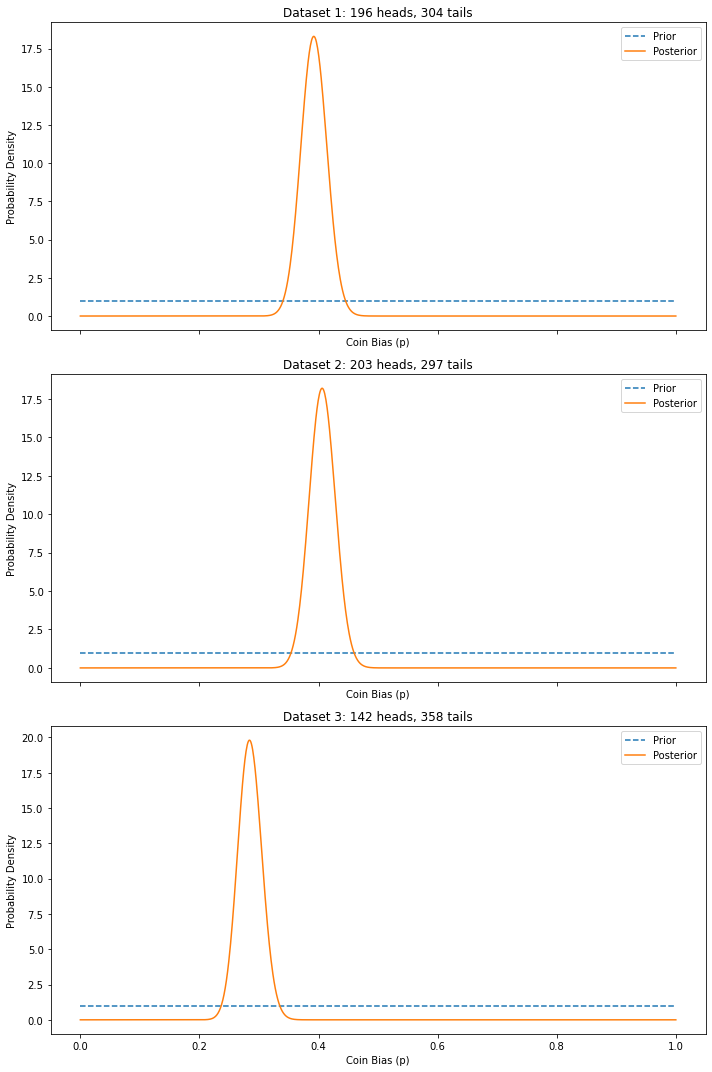

Dataset 1: Expectation = 0.39243027888446214, Variance = 0.00047401342962052765
Dataset 2: Expectation = 0.4063745019920319, Variance = 0.0004795909863275546
Dataset 3: Expectation = 0.2848605577689243, Variance = 0.00040500004054970506


'--------------------Write your code above this line------------------------------'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

'''--------------------Write your code below this line------------------------------'''

from scipy.stats import beta

fig, axs = plt.subplots(len(datasets), 1, figsize=(10, 15), sharex=True)

alpha_prior = 1  # Prior success (heads)
beta_prior = 1   # Prior failure (tails)


bias_values = np.linspace(0, 1, 1000)

for i, dataset in enumerate(datasets):

    observed_heads = sum(dataset)
    num_flips = len(dataset)

    alpha_posterior = alpha_prior + observed_heads
    beta_posterior = beta_prior + (num_flips - observed_heads)
    posterior = beta(alpha_posterior, beta_posterior).pdf(bias_values)

    axs[i].plot(bias_values, beta(alpha_prior, beta_prior).pdf(bias_values), label='Prior', linestyle='--')
    axs[i].plot(bias_values, posterior, label='Posterior')
    axs[i].set_title(f'Dataset {i+1}: {observed_heads} heads, {num_flips - observed_heads} tails')
    axs[i].set_xlabel('Coin Bias (p)')
    axs[i].set_ylabel('Probability Density')
    axs[i].legend()

plt.tight_layout()
plt.show()

for i, dataset in enumerate(datasets):
    observed_heads = sum(dataset)
    num_flips = len(dataset)
    alpha_posterior = alpha_prior + observed_heads
    beta_posterior = beta_prior + (num_flips - observed_heads)

    expectation = alpha_posterior / (alpha_posterior + beta_posterior)
    variance = (alpha_posterior * beta_posterior) / ((alpha_posterior + beta_posterior) ** 2 * (alpha_posterior + beta_posterior + 1))
    print(f"Dataset {i+1}: Expectation = {expectation}, Variance = {variance}")

'''--------------------Write your code above this line------------------------------'''



<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling’s approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\binom{N}{M}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling’s approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>


## B) 
Numerically check the Stirling’s approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling’s formula (remember, the Stirling’s formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling’s formula and the Gamma function. Please label your plot. 

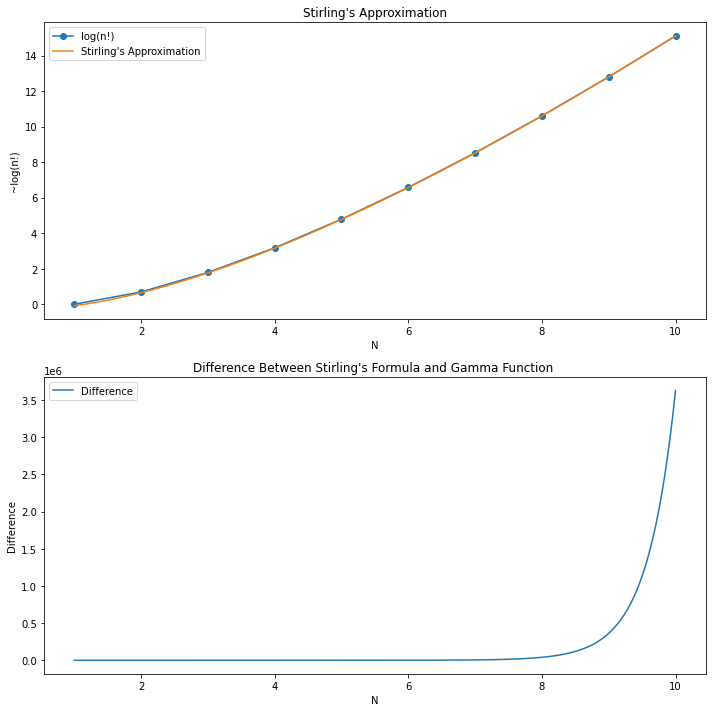

'--------------------Write your code above this line------------------------------'

In [3]:

'''--------------------Write your code below this line------------------------------'''
import scipy.special as sp

N_values=(1,2,3,4,5,6,7,8,9,10)
dense_N_values = np.linspace(1, 10, 1000)  
stirling_approx_dense = dense_N_values*np.log(dense_N_values)-dense_N_values + 0.5*np.log(2*np.pi*dense_N_values)
factorials = np.log(sp.factorial(N_values))

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot 1: Factorials vs Stirling's approximation (smooth curve)
axs[0].plot(N_values, factorials, 'o-', label='log(n!)')
axs[0].plot(dense_N_values, stirling_approx_dense, '-', label="Stirling's Approximation")
axs[0].set_xlabel('N')
axs[0].set_ylabel('~log(n!)')
axs[0].set_title("Stirling's Approximation")
axs[0].legend()

# Plot 2: Difference between Stirling's formula and the Gamma function
# Here, we also plot the difference using the dense N values for a smooth curve
difference_stirling_gamma_dense = sp.gamma(dense_N_values + 1)- stirling_approx_dense 
axs[1].plot(dense_N_values, difference_stirling_gamma_dense, '-', label="Difference")
axs[1].set_xlabel('N')
axs[1].set_ylabel('Difference')
axs[1].set_title("Difference Between Stirling's Formula and Gamma Function ")
axs[1].legend()

plt.tight_layout()
plt.show()

'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


## C)
Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br> Mp^(M-1)(1-p)^(M-N)-(M-N)p^M(1-p)^(M-N-1)=0 
p=M/N
<br>
'' **write you answer above**''
<br> <br> 
What is the $p_{\rm max}$ for the above three datasets? 
''**write you answer below**''
<br>**Data set 1:**<br> 0.39**Data set 2:** 0.41<br>**Data set 3:**
<br>0.28
'' **write you answer above**''

## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

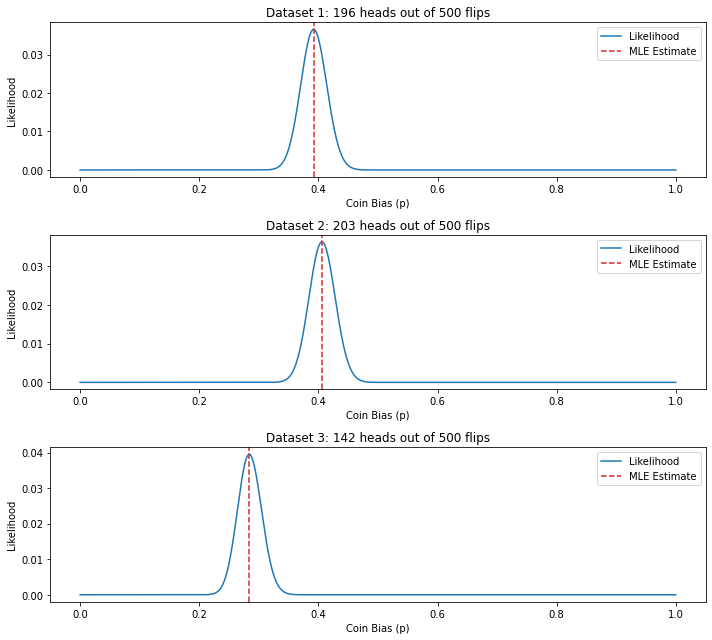

'--------------------Write your code above this line------------------------------'

In [4]:


'''--------------------Write your code below this line------------------------------'''
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def frequentist_inference_modified(datasets):
    # Create a range of possible bias values (p) for the coin
    bias_values = np.linspace(0, 1, 5000)

    # Create subplots for the different datasets
    fig, axs = plt.subplots(len(datasets), figsize=(10, len(datasets) * 3))


    if len(datasets) == 1:
        axs = [axs]


    for i, dataset in enumerate(datasets):

        observed_heads = sum(dataset)
        count_ = len(dataset)

        likelihood = binom.pmf(observed_heads, count_, bias_values)
        mle_estimate = bias_values[np.argmax(likelihood)]

        # Plot the likelihood function
        axs[i].plot(bias_values, likelihood, label='Likelihood', color='tab:blue')
        axs[i].axvline(x=mle_estimate, color='tab:red', linestyle='--', label='MLE Estimate')
        axs[i].set_title(f'Dataset {i+1}: {observed_heads} heads out of {count_} flips')
        axs[i].set_xlabel('Coin Bias (p)')
        axs[i].set_ylabel('Likelihood')
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Call the modified function with the datasets
frequentist_inference_modified(datasets)


'''--------------------Write your code above this line------------------------------'''
#If the Bayesian prior is uniform, the MLE gives the same result.

<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

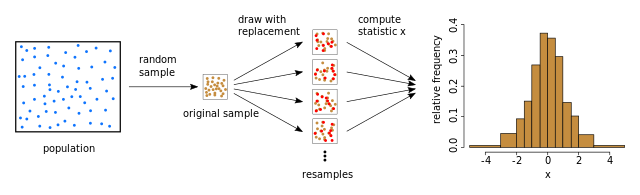
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



Sample Size   Expectation Value   Variance
5             0.3520000000000001  0.036095999999999996
15            0.3813333333333333  0.014673777777777777
40            0.39925000000000005 0.0066806875
60            0.3961666666666666  0.004088083333333334
90            0.3983333333333334  0.0026922839506172843
150           0.3867333333333333  0.0017577733333333334
210           0.3944761904761905  0.0010021405895691612
300           0.3937333333333333  0.0007280622222222223
400           0.39347499999999996 0.0005216118749999999


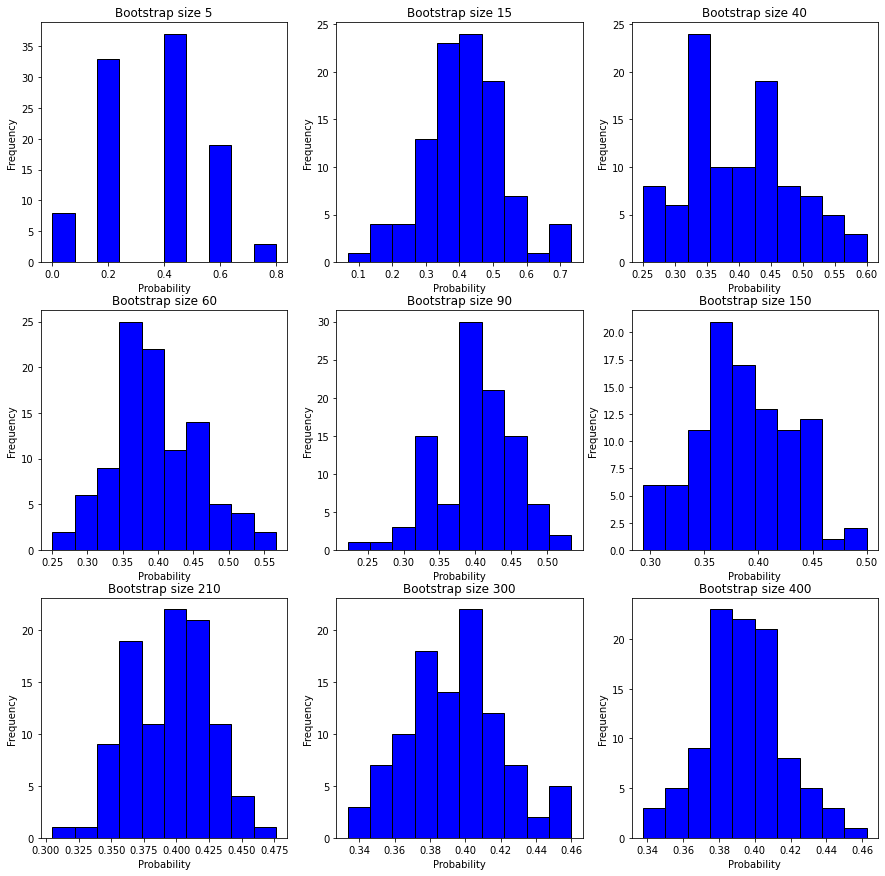

Sample Size   Expectation Value   Variance
5             0.40400000000000014 0.045584000000000006
15            0.44266666666666665 0.01684622222222222
40            0.387               0.006206000000000001
60            0.40116666666666667 0.0033903055555555566
90            0.4036666666666667  0.002612481481481482
150           0.40146666666666664 0.0011800711111111114
210           0.41714285714285715 0.0011963718820861679
300           0.4049333333333333  0.0008523288888888889
400           0.40417500000000006 0.0007985068749999998


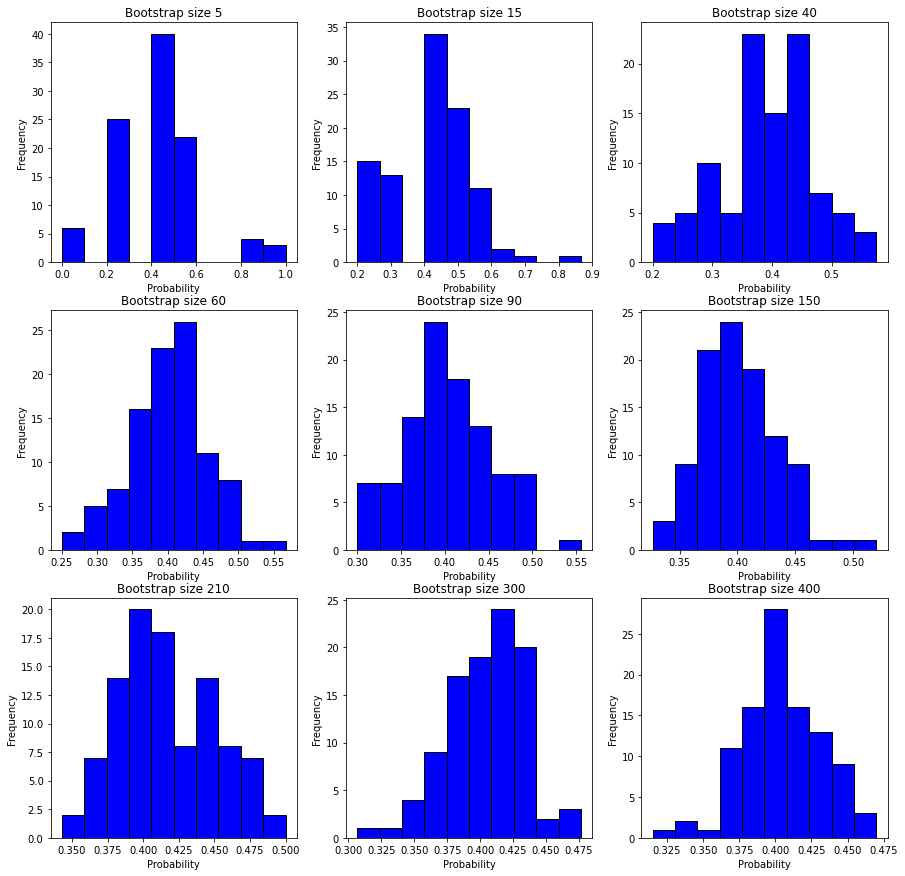

Sample Size   Expectation Value   Variance
5             0.274               0.037323999999999996
15            0.2853333333333333  0.016896  
40            0.27675             0.0055656875
60            0.2823333333333333  0.002654555555555555
90            0.28544444444444445 0.0025054197530864197
150           0.27753333333333335 0.001563248888888889
210           0.2883333333333333  0.00111218820861678
300           0.28013333333333335 0.0007726488888888888
400           0.284425            0.0006081068749999998


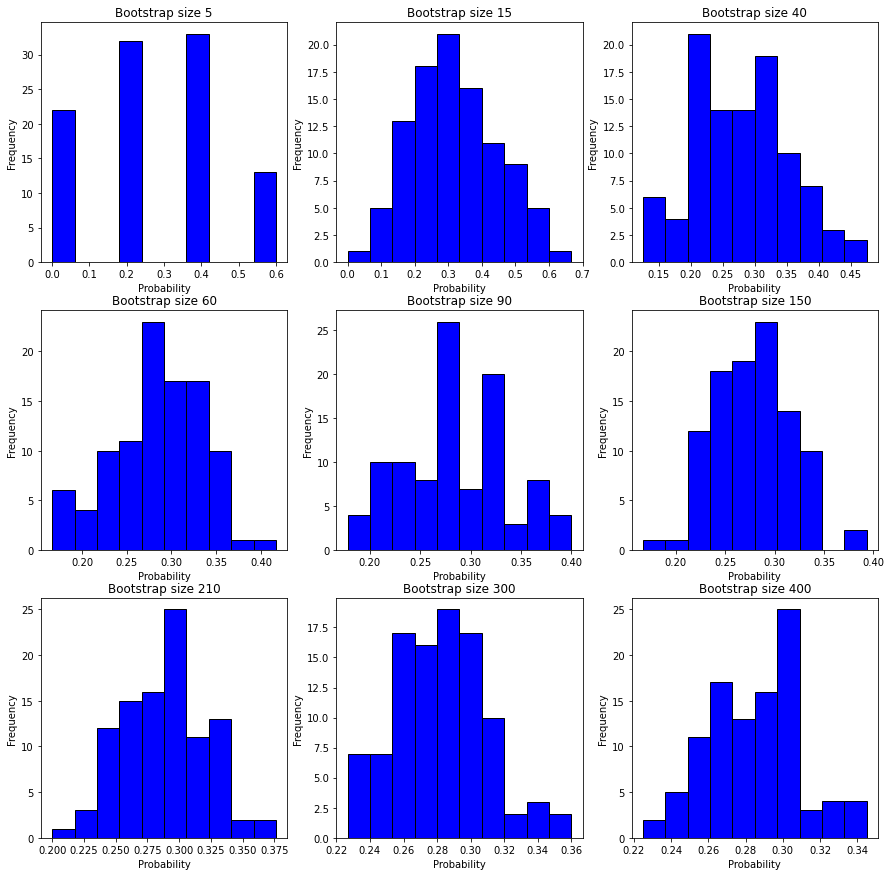

'--------------------Write your code above this line------------------------------'

In [5]:
'''--------------------Write your code below this line------------------------------'''
import json
import numpy as np
import matplotlib.pyplot as plt

# Assuming datasets is defined earlier in the code as shown in your previous messages
N = 100
sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]
nj = len(datasets)
meanst = []
variancet = []
sampledheadst = []
stdt = []

for j in range(nj): 
    boolean_data = np.array(datasets[j])
    total_heads = np.sum(boolean_data)
    mean_observed = total_heads / len(boolean_data)

    rows = 3
    cols = 3
    fig, axs = plt.subplots(rows, cols, figsize=(15, 15))
    means_dataset = []
    variance_dataset = []
    stds_dataset = []
    for i in range(rows):
        for k in range(cols):
            
            sample_draws = [[np.random.choice(boolean_data) for _ in range(sample_sizes[k + 3 * i])] for _ in range(N)]
            heads_count = [np.sum(draw) for draw in sample_draws]
            means_sample = [np.sum(draw) / len(draw) for draw in sample_draws]

            sampledheadst.append(heads_count)
            mean_value = np.mean(means_sample)
            means_dataset.append(mean_value)
            variance_value = np.var(means_sample)
            variance_dataset.append(variance_value)
            std_value = np.std(means_sample)
            stds_dataset.append(std_value)
            
            axs[i, k].hist(means_sample, color='b', edgecolor='black')
            axs[i, k].set_ylabel("Frequency")
            axs[i, k].set_xlabel("Probability")
            axs[i, k].set_title(f"Bootstrap size {sample_sizes[k + 3 * i]}")

    print(f"Sample Size   Expectation Value   Variance")
    for i in range(len(sample_sizes)):
        sample = f"{sample_sizes[i]:<14}"
        expectation = f"{means_dataset[i]:<20}"
        variance = f"{variance_dataset[i]:<10}"
        print(f"{sample}{expectation}{variance}")
    meanst.append(means_dataset)
    variancet.append(variance_dataset)
    stdt.append(stds_dataset)
    plt.show()


'''--------------------Write your code above this line------------------------------'''

## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

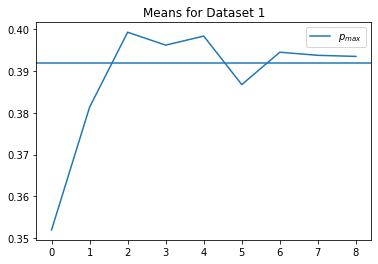

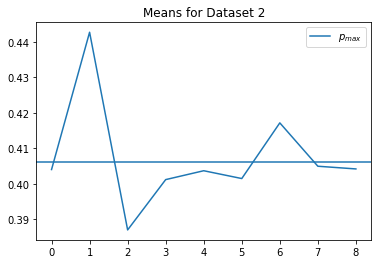

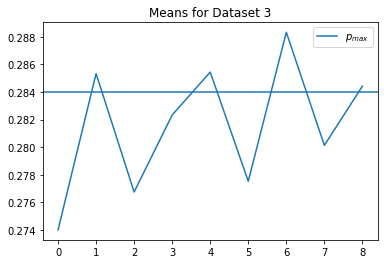

'--------------------Write your code above this line------------------------------'

In [6]:

'''--------------------Write your code below this line------------------------------'''
meanst = np.array(meanst)
sample_sizes = np.array(sample_sizes)
variancet = np.array(variancet)
stdt = np.array(stdt)

for i in range(3):
    file_path = f'problem_1/dataset_{i + 1}.json' 
    with open(file_path, 'r') as json_file:
        dataset = json.load(json_file)
    dataset = np.array(dataset)
    total_heads = np.sum(dataset)
    dataset_length = len(dataset)
    sample_indices = np.arange(9)
    
    plt.plot(sample_indices, meanst[i])
    plt.axhline(y=total_heads / dataset_length, label='$p_{max}$')
    plt.title(f"Means for Dataset {i+1}")
    plt.legend()
    plt.show()

'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
​
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
​
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''
class Particle:
    def __init__(self, decay_param):
        self.decay_param = decay_param
        
    def pdf_decay(self, t):
        amp=np.exp(-1/self.decay_param)*self.decay_param
        return np.exp(-(t-1)/self.decay_param)/self.decay_param
'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

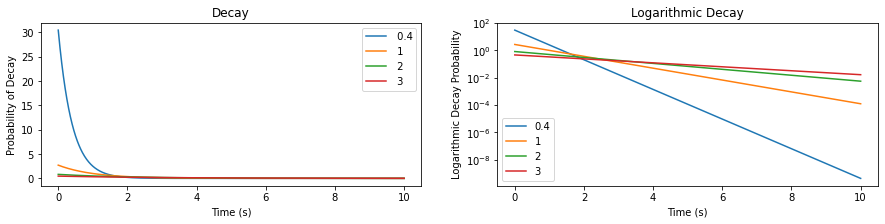

'--------------------Write your code above this line------------------------------'

In [8]:


'''--------------------Write your code below this line------------------------------'''
decay_params = [.4, 1, 2, 3]
particles = [Particle(dp) for dp in decay_params]
time_values = np.linspace(0, 10, 1000)

fig, ax_set = plt.subplots(1, 2, figsize=(15, 3))
for idx, decay_param in enumerate(decay_params):
    ax_set[0].plot(time_values, particles[idx].pdf_decay(time_values), label=f' {decay_param}')
    ax_set[1].semilogy(time_values, particles[idx].pdf_decay(time_values), label=f'{decay_param}')

ax_set[0].set_ylabel("Probability of Decay")
ax_set[0].set_xlabel("Time (s)")
ax_set[1].set_ylabel("Logarithmic Decay Probability")
ax_set[1].set_xlabel("Time (s)")
ax_set[0].set_title("Decay")
ax_set[1].set_title("Logarithmic Decay")
ax_set[0].legend()
ax_set[1].legend()
plt.show()
'''--------------------Write your code above this line------------------------------'''

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

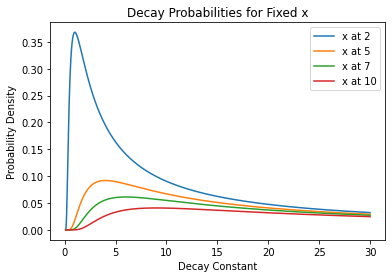

'--------------------Write your code above this line------------------------------'

In [15]:

'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

class DecayParticle:
    def __init__(self, lambda_value):
        self.lambda_value = lambda_value

    def probability_density_function(self, time):
        amplitude = np.exp(-1 / self.lambda_value) * self.lambda_value
        return np.exp(-(time - 1) / self.lambda_value) / self.lambda_value

    @staticmethod
    def static_pdf(lambda_decay, time_point):
        return np.exp(-(time_point - 1) / lambda_decay) / lambda_decay

fixed_times = [2, 5, 7, 10]
sample_particle = DecayParticle(2) 

decay_constants = np.linspace(0.1, 30, 1000)

for fixed_time in fixed_times:
    plt.plot(decay_constants, DecayParticle.static_pdf(decay_constants, fixed_time), label=f'x at {fixed_time}')

plt.title("Decay Probabilities for Fixed x")
plt.ylabel('Probability Density')
plt.xlabel("Decay Constant")
plt.legend()
plt.show()

'''--------------------Write your code above this line------------------------------'''

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


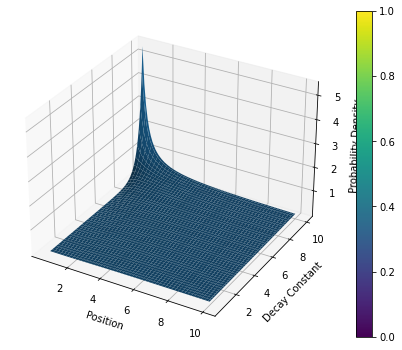

'--------------------Write your code above this line------------------------------'

In [22]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D


'''--------------------Write your code below this line------------------------------'''
class DecayModel:
    def __init__(self, lambda_constant):
        self.lambda_constant = lambda_constant

    def decay_probability_density(self, time):
        amplitude = np.exp(-1 / self.lambda_constant) * self.lambda_constant
        return np.exp(-(time - 1) / self.lambda_constant) / self.lambda_constant

    def static_decay_pdf(self, decay_rate, position):
        return np.exp(-(position - 1) / decay_rate) / decay_rate

file_path = 'PDsurface'

position_range = np.linspace(0.5, 10, 100)
decay_range = np.linspace(0.5, 10, 100)

decay_range, position_range = np.meshgrid(position_range, decay_range)

decay_particle = DecayModel(0) 
probability_density = decay_particle.static_decay_pdf(position_range, decay_range)
probability_density = np.array([density[::-1] for density in probability_density])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(position_range, decay_range, probability_density)
ax.set_xlabel("Position")
ax.set_ylabel("Decay Constant")
ax.set_zlabel("Probability Density")

plt.colorbar(surface)
plt.savefig(file_path, dpi=300)
plt.show()


'''--------------------Write your code above this line------------------------------'''

In [ ]:

'''--------------------Write your code below this line------------------------------'''

'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




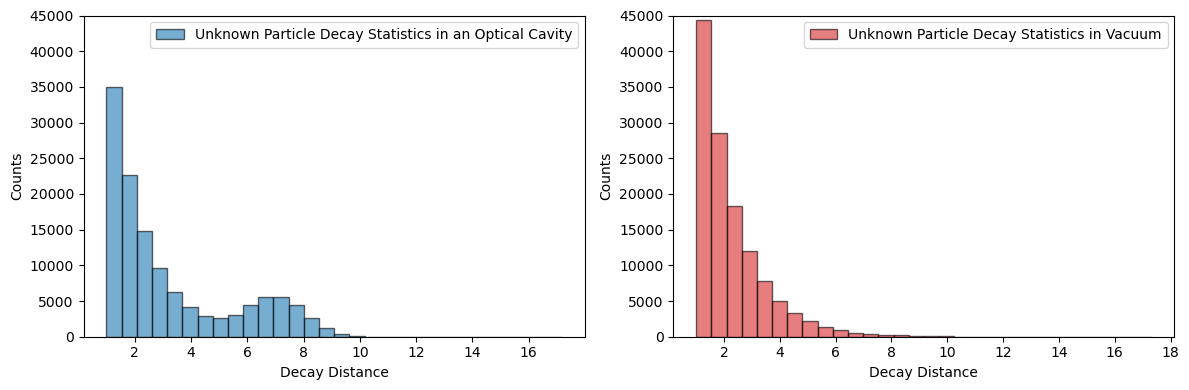

## E)
ou can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

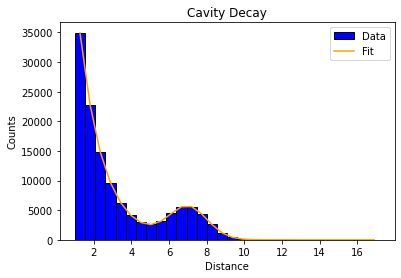

Decay constant 1.2569


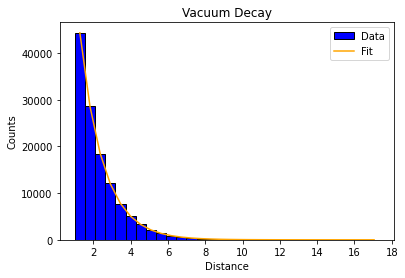

Decay constant 1.2552


'--------------------Write your code above this line------------------------------'

In [23]:
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''

def prob_decay_combined(x, decay_lambda, mu, sigma, amplitude_gaussian, amplitude_exponential):
    gaussian_component = amplitude_gaussian * scipy.stats.norm.pdf(x, mu, sigma)
    exponential_component = amplitude_exponential * np.exp(-(x - 1) / decay_lambda) / decay_lambda
    return gaussian_component + exponential_component


cavity_dataset_path = "problem_2/Cavity_decay_dataset.json"
with open(cavity_dataset_path, 'r') as file:
    cavity_data = json.load(file)

bin_edges = np.arange(0, 12)
counts, bin_edges = np.histogram(cavity_data, bins=30)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


optimal_params, params_covariance = scipy.optimize.curve_fit(
    prob_decay_combined,
    bin_centers,
    counts,
    maxfev=1000,
    p0=[.5, 7, .2, .3, 1]
)

plt.hist(cavity_data, bins=30, label='Data', color='b', edgecolor='black')
plt.plot(bin_centers, prob_decay_combined(bin_centers, *optimal_params), color='orange', label='Fit')
plt.title("Cavity Decay")
plt.xlabel("Distance")
plt.ylabel("Counts")
plt.legend()
plt.show()
print(f"Decay constant {optimal_params[0]:.4f}")


vacuum_dataset_path = "problem_2/Vacuum_decay_dataset.json"
with open(vacuum_dataset_path, 'r') as file:
    vacuum_data = json.load(file)

counts, bin_edges = np.histogram(vacuum_data, bins=30)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


optimal_params, params_covariance = scipy.optimize.curve_fit(
    prob_decay_combined,
    bin_centers,
    counts,
    maxfev=1000,
    p0=[.5, 7, 1, .3, 1]
)

plt.hist(vacuum_data, bins=30, label='Data', color='b', edgecolor='black')
plt.plot(bin_centers, prob_decay_combined(bin_centers, *optimal_params), color='orange', label='Fit')
plt.title("Vacuum Decay")
plt.xlabel("Distance")
plt.ylabel("Counts")
plt.legend()
plt.show()
print(f"Decay constant {optimal_params[0]:.4f}")
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,

<br> 
$$
M(t|\lambda) \sim \frac{e^{\frac{1-x + tx}{\lambda}}}{(-1 + t)}
$$
<br><br> **Steps:** <br>
<br>
We have:
$$
    M(t|\lambda) \sim \int dx e^{tx} P(x | \lambda)
$$
Plugging in $P(x|\lambda)$:
$$
M(t|\lambda) \sim \int dx e^{tx} \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}
$$
Plugging in $Z(\lambda)$:
$$
M(t|\lambda) \sim \int dx e^{tx} \frac{1}{ e^{-1/\lambda}} \frac{1}{\lambda}e^{-x/\lambda}\\
\sim \int dx \frac{e^{(tx-x+1)/\lambda}}{\lambda} \\
\sim \frac{e^{\frac{1-x + tx}{\lambda}}}{(-1 + t)}
$$
<br> <br> 

## B) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
\begin{align}
m_1&=\frac{ -x -\lambda}{\lambda} e^{\frac{1 - x}{\lambda}}\\
m_2&=\frac{ -x^2 -2x\lambda -2\lambda^2}{\lambda^2} e^{\frac{1 - x}{\lambda}}
\end{align}
<br><br> **Steps:** <br>
<br>
We know that the mean is the first moment, $m_1$ and the variance is the second moment, $m_2$. \\
The first and second moments are given by:
\begin{align}
m_1=\left. \frac{\partial}{\partial t} M(t|\lambda) \right|_{t=0}\\
m_2=\left. \frac{\partial^2}{\partial t^2} M(t| \lambda) \right|_{t=0}
\end{align}
The first derivative is given by:
\begin{align}
    \frac{\partial}{\partial t}M(t|\lambda)&=\frac{\partial}{\partial t} \frac{e^{\frac{1-x + tx}{\lambda}}}{(-1 + t)}\\
    &= \frac{(t x -x- \lambda)}{(-1 + t)^2 \lambda} e^{\frac{1 -x + tx}{\lambda}}
\end{align}
The second derivative is given by:
\begin{align}
    \frac{\partial^2}{\partial t^2} M(t|\lambda)&=\frac{\partial^2}{\partial t^2} \frac{e^{\frac{1-x + tx}{\lambda}}}{(-1 + t)}\\
    &=\frac{ \left(( -1 + t)^2 x^2+2x \lambda -2 t x \lambda + 2 \lambda^2\right)}{(-1 + t)^3 \lambda^2}e^{\frac{1 -x + tx}{\lambda}}
\end{align}
Evaluated at zero these give:
\begin{align}
    m_1&=\left. \frac{\partial}{\partial t} M(t|\lambda) \right|_{t=0}\\
    &=\left. \frac{(t x -x- \lambda)}{(-1 + t)^2 \lambda} e^{\frac{1 -x + tx}{\lambda}}\right|_{t=0}\\
    &= \frac{ -x -\lambda}{\lambda} e^{\frac{1 - x}{\lambda}}\\
    m_2&=\left. \frac{\partial^2}{\partial t^2} M(t| \lambda) \right|_{t=0}\\
    &=\left. \frac{ \left(( -1 + t)^2 x^2+2x \lambda -2 t x \lambda + 2 \lambda^2\right)}{(-1 + t)^3 \lambda^2}e^{\frac{1 -x + tx}{\lambda}}\right|_{t=0}\\
    &=\frac{ -x^2 -2x\lambda -2\lambda^2}{\lambda^2} e^{\frac{1 - x}{\lambda}}
\end{align}
<br> <br> 

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

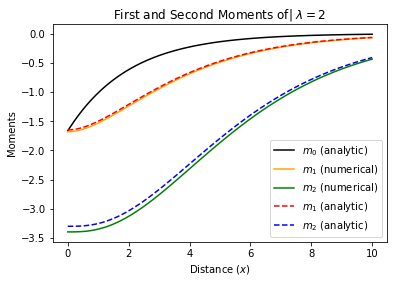

'--------------------Write your code above this line------------------------------'

In [26]:
'''--------------------Write your code below this line------------------------------'''
def calculate_moment(t_value, distance, lambda_value):
    return np.exp((1 - distance + t_value * distance) / lambda_value) / (-1 + t_value)

distance_values = np.linspace(0, 1, 1000)
lambda_param = 2
t_values = np.linspace(-0.9, 0.9, 100)
delta_t = t_values[1] - t_values[0]

moment_0_data = []
moment_1_data = []
moment_2_data = []

for dist in np.linspace(0, 10, 100):
    moment = calculate_moment(t_values, dist, lambda_param)
    first_derivative = np.gradient(moment, delta_t)
    closest_index = np.abs(t_values).argmin()
    moment_0_data.append([dist, moment[closest_index]])
    moment_1_data.append([dist, first_derivative[closest_index]])
    second_derivative = np.gradient(first_derivative, delta_t)
    moment_2_data.append([dist, second_derivative[closest_index]])

moment_0_data = np.array(moment_0_data).T
moment_1_data = np.array(moment_1_data).T
moment_2_data = np.array(moment_2_data).T

plt.plot(moment_0_data[0], moment_0_data[1], label='$m_0$ (analytic)', color='black')
plt.plot(moment_1_data[0], moment_1_data[1], label='$m_1$ (numerical)', color='orange')
plt.plot(moment_2_data[0], moment_2_data[1], label='$m_2$ (numerical)', color='green')

def first_moment_analytic(dist, lambda_param):
    return np.exp((1 - dist) / lambda_param) * (-dist - lambda_param) / lambda_param

def second_moment_analytic(dist, lambda_param):
    return np.exp((1 - dist) / lambda_param) * (-dist**2 - 2 * dist * lambda_param - 2 * lambda_param**2) / (lambda_param**2)

distance_range = moment_0_data[0]
first_moment_values = first_moment_analytic(distance_range, lambda_param)
plt.plot(distance_range, first_moment_values, label='$m_1$ (analytic)', color='red', linestyle='--')

second_moment_values = second_moment_analytic(distance_range, lambda_param)
plt.plot(distance_range, second_moment_values, label='$m_2$ (analytic)', color='blue', linestyle='--')

plt.xlabel('Distance ($x$)')
plt.ylabel('Moments')
plt.title(f'First and Second Moments of| $\\lambda={lambda_param}$')
plt.legend()
plt.show()

'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
<br> 

$$
M(p,t)= (1-p+e^{t}p)^N
$$
<br><br> **Steps:** <br>
We know that:
\begin{align}
    M(p,t)&=\sum_{M=0}^{N} e^{M t} P(M,N|p)\\
    &=\sum_{M=0}^{N} e^{M t} \binom{N}{M} p^M (1-p)^{N-M}\\
    &=\sum_{M=0}^{N} \binom{N}{M} (e^{t}p)^M (1-p)^{N-M}\\
\end{align}
Using the identity:
\begin{align*}
    (a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k
\end{align*}
We can show that:
\begin{align}
    M(t)&= (1-p+e^{t}p)^N
\end{align}

## E) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
\begin{align}
    m_1&=Np\\
    m_2&=Np(1-p+Np)
\end{align}
<br><br> **Steps:** <br>
The mean and variance, $m_1$ and $m_2$ are defined by:
\begin{align}
    m_1&=\left. \frac{\partial}{\partial t} M(t) \right|_{t=0}\\
    m_2&=\left. \frac{\partial^2}{\partial t^2} M(t) \right|_{t=0}
\end{align}
We have
\begin{align}
    \frac{\partial}{\partial t} M(t) &=N e^{t} p (1 - p + e^{t}p)^{N-1}\\
    \frac{\partial^2}{\partial t^2} M(t) &=N e^{t} p (1 - p + e^{t} p)^{N-2}(1 - p + N e^{t} p )
\end{align}
Evaluated at $t=0$, these give:
\begin{align}
    m_1&=Np\\
    m_2&=Np(1-p+Np)
\end{align}
<br> <br> 

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

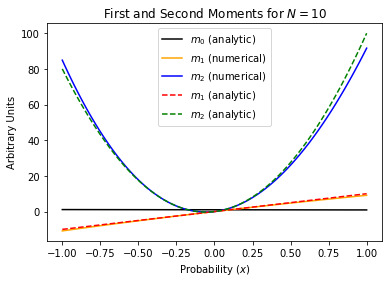

'--------------------Write your code above this line------------------------------'

In [27]:


'''--------------------Write your code below this line------------------------------'''
from scipy.stats import binom

def calculate_moment_series(probability, total_count, time_series):
    return np.power((1 - probability + np.exp(time_series) * probability), total_count)

total_trials = 10
true_probability = 0.5
expected_value = total_trials * true_probability

time_range = np.linspace(-1, 1, 100)
delta_time = time_range[1] - time_range[0]

moment_zero_data = []
moment_one_data = []
moment_two_data = []

for prob in np.linspace(-1, 1, 100):
    series_moment = calculate_moment_series(prob, total_trials, time_range)
    first_derivative = np.gradient(series_moment, delta_time)
    zero_index = np.abs(time_range).argmin() # gets the index where time_range is closest to 0
    moment_zero_data.append([prob, series_moment[zero_index]])
    moment_one_data.append([prob, first_derivative[zero_index]])
    second_derivative = np.gradient(first_derivative, delta_time)
    moment_two_data.append([prob, second_derivative[zero_index]])

moment_one_data = np.array(moment_one_data).T
moment_two_data = np.array(moment_two_data).T
moment_zero_data = np.array(moment_zero_data).T

binomial_probabilities = binom.pmf(expected_value, total_trials, moment_zero_data[0])

plt.plot(moment_zero_data[0], moment_zero_data[1], label='$m_0$ (analytic)', color='black')
plt.plot(moment_one_data[0], moment_one_data[1], label='$m_1$ (numerical)', color='orange')
plt.plot(moment_two_data[0], moment_two_data[1], label='$m_2$ (numerical)', color='blue')

probability_range = moment_zero_data[0]
first_moment_analytic = total_trials * probability_range
plt.plot(probability_range, first_moment_analytic, label='$m_1$ (analytic)', color='red', linestyle='--')

second_moment_analytic = total_trials * probability_range * (1 - probability_range + total_trials * probability_range)
plt.plot(probability_range, second_moment_analytic, label='$m_2$ (analytic)', color='green', linestyle='--')

plt.legend()
plt.title(f'First and Second Moments for $N={total_trials}$')
plt.xlabel('Probability ($x$)')
plt.ylabel('Arbitrary Units')
plt.show()

'''--------------------Write your code above this line------------------------------'''